## Importing and Cleaning Data

In [39]:
# pip install ImageHash
# pip install xlrd
from PIL import Image
import matplotlib.pyplot as plt
import os #operation system library to work with files, folders, paths - system ops
import hashlib
import pandas as pd
import numpy as np
import shutil #system library to with with files, like copy paste files

### Reading and displaying images

In [40]:

root_dir = r'D:\DataScienceKurs\retinopathy-classifier\data\messidor2\images' # r - raw string

tif_files = []
image_size = []
for subdir, dirs, files in os.walk(root_dir): #os.walk is a function to return a path to the directory, list of subdirectories, list of files
    for file in files:
        path = os.path.join(subdir, file)
        tif_files.append(path)
        try:
            with Image.open(path) as img:
                image_size.append(img.size)
        except Exception as e:
            print(f"Error opening {path}: {e}")

print(f"Found {len(tif_files)} files")
print("Unique image sizes:", set(image_size))

Found 1182 files
Unique image sizes: {(2240, 1488), (2304, 1536), (1440, 960)}


#### Resize the images

#### Open and show first images

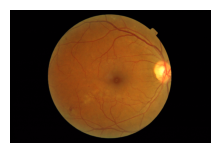

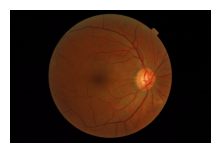

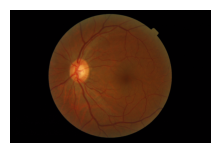

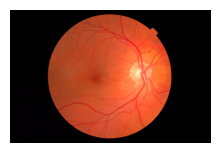

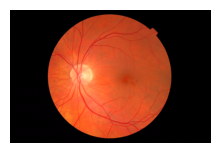

In [41]:
images = 5

for i in range(images):
    img = Image.open(tif_files[i])
    plt.figure(figsize=(15, 5))
    plt.subplot(1, images, i+1)
    plt.imshow(img) #display img in matplotlip plot
    # plt.title(os.path.basename(first_image_path)) #titel of plot = titel of image
    plt.axis('off') #hide axis
    plt.show()


#### Duplicates? 

In [42]:
# def hash_file(path):
#     hasher = hashlib.md5()
#     with open(path, 'rb') as f:
#         buf = f.read()
#         hasher.update(buf)
#     return hasher.hexdigest()

# hashes = {}
# duplicates = []

# for path in tif_files:
#     file_hash = hash_file(path)
#     if file_hash in hashes:
#         duplicates.append((path, hashes[file_hash]))
#     else:
#         hashes[file_hash] = path

# print(f"Found {len(duplicates)} duplicates")
# for dup in duplicates:
#     print(f"Duplikat: {dup[0]} and {dup[1]}")


##### Found 13 duplicates - removed manually

### Load and understand Annotations

#### Load and merge all annotations and create a df

In [43]:
annotations_dir = r"D:\DataScienceKurs\retinopathy-classifier\data\messidor2\annotations"
annotation_files = [f for f in os.listdir(annotations_dir) if f.endswith('.xls')] #os.listdir - returns a list of files and folders in the given directory
all_annotations = []

for file in annotation_files:
    file_path = os.path.join(annotations_dir, file) # os.path - joins path elements in a system safe way
    df = pd.read_excel(file_path, engine ='xlrd')
    all_annotations.append(df)

annotations_df = pd.concat(all_annotations, ignore_index = True)

In [44]:
annotations_df.tail()

,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
1177,20051021_40377_0100_PP.tif,Service Ophtalmologie Lariboisière,3,2
1178,20051021_40450_0100_PP.tif,Service Ophtalmologie Lariboisière,3,2
1179,20051021_51418_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0
1180,20051021_51476_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0
1181,20051021_51561_0100_PP.tif,Service Ophtalmologie Lariboisière,3,0


#### Does all images have annotation?

In [45]:
annotations_df['image_path'] = annotations_df['Image name'].apply(
    lambda x: next((f for f in tif_files if os.path.basename(f) == x), None)
) # next - function looks for the first match and doesn't look anymore

missing = annotations_df['image_path'].isnull().sum()
print(f"Missing images: {missing}")

Missing images: 0


In [46]:
annotations_df.head()

,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema,image_path
0,20051021_51625_0100_PP.tif,Service Ophtalmologie Lariboisière,3,0,D:\DataScienceKurs\retinopathy-classifier\data...
1,20051021_51748_0100_PP.tif,Service Ophtalmologie Lariboisière,3,1,D:\DataScienceKurs\retinopathy-classifier\data...
2,20051021_51804_0100_PP.tif,Service Ophtalmologie Lariboisière,3,1,D:\DataScienceKurs\retinopathy-classifier\data...
3,20051021_51936_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0,D:\DataScienceKurs\retinopathy-classifier\data...
4,20051021_51994_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0,D:\DataScienceKurs\retinopathy-classifier\data...


#### Images with paths to CSV

In [47]:
annotations_df.to_csv(r"D:/DataScienceKurs/retinopathy-classifier/data/processed/annotations_with_paths.csv", index=False)

#### Sort the data into folders based on retinopathy grade

In [48]:
# annotations_df.rename(columns={
#     'Retinopathy grade': 'grade',
#     'image_path': 'path'
# }, inplace=True)

# output_dir = r"D:\DataScienceKurs\retinopathy-classifier\data\grouped"
# os.makedirs(output_dir, exist_ok=True)

# # Create folders 0,1,2,3
# grades = annotations_df['grade'].unique()
# for grade in grades:
#     folder_name = f"grade_{grade}"
#     os.makedirs(os.path.join(output_dir, folder_name), exist_ok=True)

# # Sortowanie i kopiowanie
# for idx, row in annotations_df.iterrows():
#     src = row['path']
#     grade = str(row['grade'])
#     filename = os.path.basename(src)
#     folder_name = f"grade_{grade}"
#     dest = os.path.join(output_dir, folder_name, filename)
#     try:
#         shutil.copy(src, dest)
#     except Exception as e:
#         print(f"Error {src} → {dest}: {e}")

# print("✅ All images are sorted")

## Early Data Analysis

### Value Counts for Retinopathy grade

In [49]:
annotations_df['Retinopathy grade'].value_counts()

Retinopathy grade
0    547
3    249
2    237
1    149
Name: count, dtype: int64

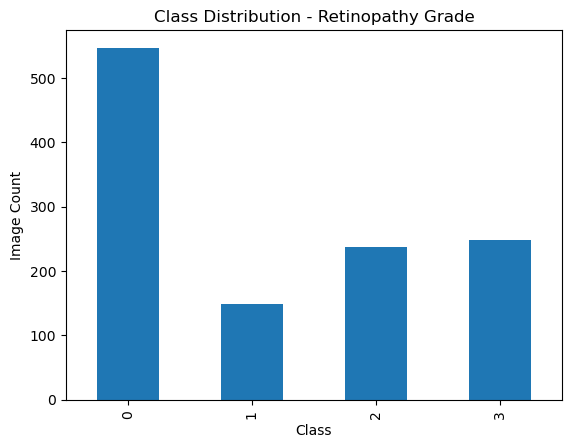

In [50]:
annotations_df['Retinopathy grade'].value_counts().sort_index().plot(kind='bar') #sort the index ascending from 0 to 3
plt.title("Class Distribution - Retinopathy Grade")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.show()